In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

df=pd.read_csv("Car_details_v3.csv")
#The data source is the following https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [465]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# Feature engineering

In [466]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [467]:
#We have few columns with missing values, lets see how the values for each look like 

In [468]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [469]:
#Making sure that the engine units are the same for all rows and are in cubic centimeters (CC) 
len(df[df["engine"].str.split().str[1]=="CC"])
#this is consistent with 7907 non zero values in this column

7907

In [470]:
#Getting rid of the units and storing the numbers as float
df["engine"]=df["engine"].str.split().str[0].astype(float)

In [471]:
#Maxpower  has 7 rows with 6 of them with 0 value and 1 with just unit
cond=(df["max_power"].str.split().str[1]!="bhp") & (df["max_power"].str.split().str[0].notnull())
df[cond]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
575,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
576,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
1442,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN,NaN
1443,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN,NaN
2549,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
2550,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0,bhp,NaN,8.0


In [472]:
drop_ind=df[cond].index

In [473]:
#Dropping above 7 rows as they have nan values also for other columns
df=df.drop(drop_ind)

In [474]:
len(df)

8121

In [475]:
#Getting rid of the units and storing the numbers as float
df["max_power"]=df["max_power"].str.split().str[0].astype(float)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8121 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8121 non-null   object 
 1   year           8121 non-null   int64  
 2   selling_price  8121 non-null   int64  
 3   km_driven      8121 non-null   int64  
 4   fuel           8121 non-null   object 
 5   seller_type    8121 non-null   object 
 6   transmission   8121 non-null   object 
 7   owner          8121 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 888.2+ KB


In [477]:
#Look at the rows with null values
df[pd.isnull(df).any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [478]:
#These 215 rows have null values for muliple columns, so we will drop them
null_ind=df[pd.isnull(df).any(axis=1)].index
df=df.drop(null_ind)

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 864.7+ KB


In [480]:
#Now lets check number of unique values for different categorical variables
df["name"].nunique()  #This doesn't seem as a useful feature to include in price prediction 

1982

In [481]:
df=df.drop("name",axis=1)

In [482]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [483]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [484]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [485]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [486]:
df["torque"].head(10)

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
5           113.75nm@ 4000rpm
6        7.8@ 4,500(kgm@ rpm)
7               59Nm@ 2500rpm
8         170Nm@ 1800-2400rpm
9              160Nm@ 2000rpm
Name: torque, dtype: object

In [487]:
#We will drop his column since the units used for different rows correspond to different physical quaniies
#Also some of them have fixed values while others show range of vlaues

In [488]:
df=df.drop("torque",axis=1)

In [489]:
#Mileage column has two non-comparable units (kilometer per liter (kmpl) (fuels in liquid state) and kilometers per kilograms (km/kg) (fuels in gaseous state))

In [490]:
df.head(8)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.20,5.0
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197.0,81.86,5.0
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061.0,57.50,5.0
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796.0,37.00,4.0


In [491]:
len_liquid=len(df[df["mileage"].str.split().str[1]=="kmpl"])
len_liquid

7819

In [492]:
len_gas=len(df[df["mileage"].str.split().str[1]=="km/kg"])
len_gas

87

In [493]:
len_gas/len(df)*100

1.1004300531242095

In [537]:
df["fuel"].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [494]:
#This is only one percent of data, we can drop corresponding rows
drop_ind_mileage=df[df["mileage"].str.split().str[1]=="km/kg"].index
df=df.drop(drop_ind_mileage)

In [495]:
#Getting rid of the units and storing the numbers as float
df["mileage"]=df["mileage"].str.split().str[0].astype(float)

In [496]:
#We are now left with this many rows
len(df)

7819

In [497]:
df[df.duplicated(keep='first')]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
291,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,5.0
296,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,5.0
370,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,5.0
371,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,5.0
372,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33,1999.0,177.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7987,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37,1461.0,108.45,5.0
7988,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09,1248.0,88.50,5.0
8117,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [498]:
df=df.drop_duplicates()

In [499]:
len(df)

6612

# Exploratory data analysis (EDA)

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6612 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6612 non-null   int64  
 1   selling_price  6612 non-null   int64  
 2   km_driven      6612 non-null   int64  
 3   fuel           6612 non-null   object 
 4   seller_type    6612 non-null   object 
 5   transmission   6612 non-null   object 
 6   owner          6612 non-null   object 
 7   mileage        6612 non-null   float64
 8   engine         6612 non-null   float64
 9   max_power      6612 non-null   float64
 10  seats          6612 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 619.9+ KB


<Figure size 1200x900 with 0 Axes>

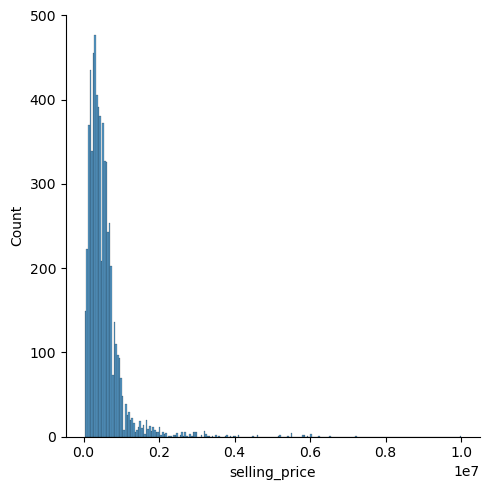

In [501]:
plt.figure(figsize=(8,6),dpi=150)
sns.displot(df["selling_price"])

In [502]:
#We can see that there are outliers that need to be removed
df_no_outliers = df[df['selling_price'] < 4000000]
df_no_outliers_filter=(df['selling_price'] < 4000000)
#The percent of selected outliers is
(len(df)-len(df_no_outliers))/len(df)*100

0.3932244404113733

(array([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

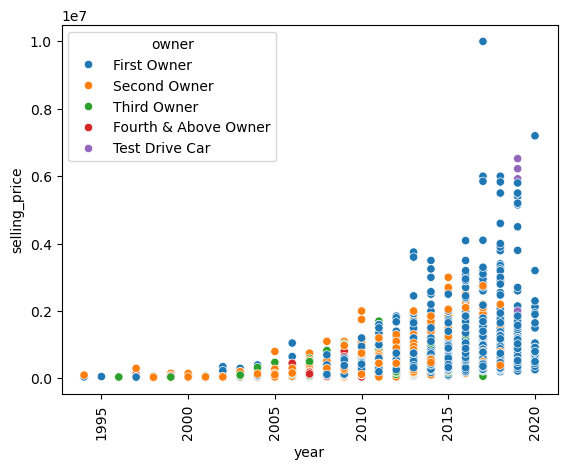

In [503]:
sns.scatterplot(data=df,x="year",y="selling_price",hue="owner")
plt.xticks(rotation=90)
#As expected the newer the car the less owners it had and higher selling price corresponds to newer cars

In [504]:
#We can see that there are outliers that need to be removed
df_no_outliers = df[df['year'] > 2000]
#The percent of selected outliers is
(len(df)-len(df_no_outliers))/len(df)*100

0.7562008469449486

([0, 1, 2, 3, 4],
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Third Owner'),
  Text(3, 0, 'Fourth & Above Owner'),
  Text(4, 0, 'Test Drive Car')])

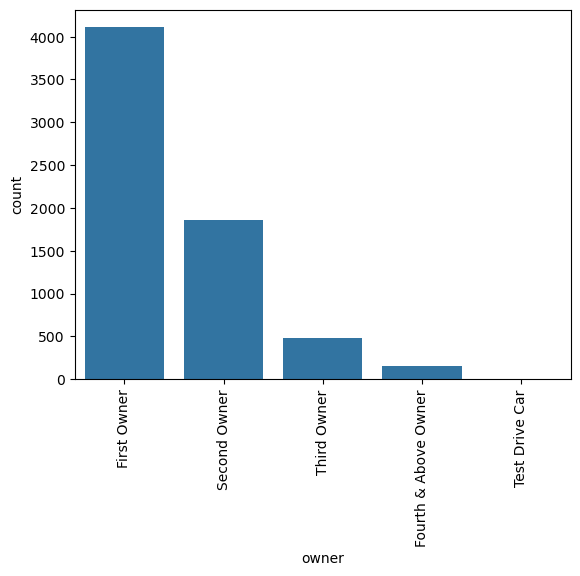

In [505]:
sns.countplot(data=df,x="owner")
plt.xticks(rotation=90)

In [506]:
df_test_drive=df[df["owner"]=="Test Drive Car"]
len(df_test_drive)/len(df)*100

0.07562008469449485

In [507]:
#Since only 0.07% of data has "Test Drive Car" category in "owner" feature, we will drop corresponding rows
df=df[df["owner"]!="Test Drive Car"]
#We will also combine "Third owner" and "Fourth & Above Owners" Categories under "Third and above owners"
df["owner"]=df["owner"].replace({"Third Owner":"Third and above owners","Fourth & Above Owner":"Third and above owners"})

<Axes: xlabel='owner', ylabel='count'>

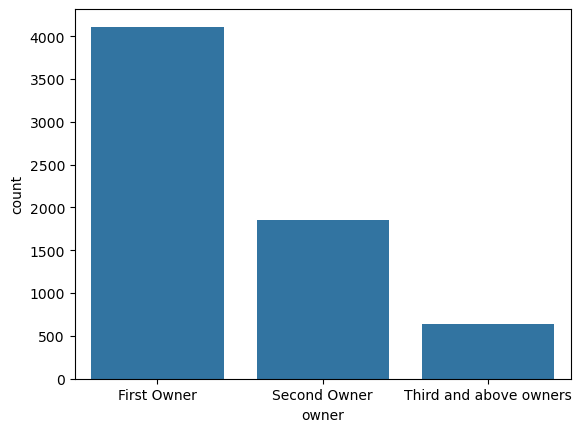

In [508]:
sns.countplot(data=df,x="owner")

<Axes: xlabel='seller_type', ylabel='count'>

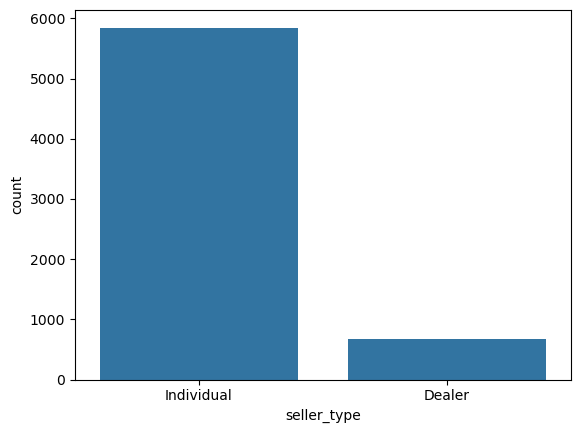

In [538]:
sns.countplot(data=df,x="seller_type")

In [539]:
df_trustmark=df[df["seller_type"]=="Trustmark Dealer"]
len(df_trustmark)/len(df)*100

0.0

In [540]:
df_dealer=df[df["seller_type"]=="Dealer"]
len(df_dealer)/len(df)*100

10.254835738409579

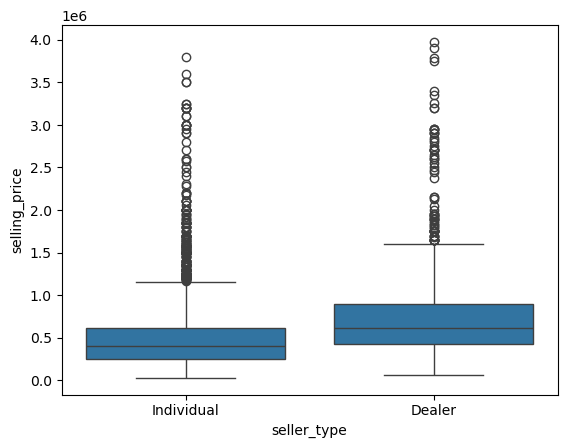

In [541]:
sns.boxplot(data=df,x="seller_type",y="selling_price")
plt.ylim=(0,7000000)
#the plot shows that the selling_price in average is higher for Dealer Seller Type than for individual,
#so this this categorical feature is infomaive however the categories are highly imbalanced with "Trustmark Dealer" 
#being only 0.4% of data and "Dealer" being only 10% data, for now we will unite "Trustmark Dealer" with "Dealer" 
#in model creation we should have in mind that "seller_type" is highely imbalanced

In [513]:
df["seller_type"]=df["seller_type"].replace({"Trustmark Dealer":"Dealer"})

<Axes: xlabel='seller_type', ylabel='count'>

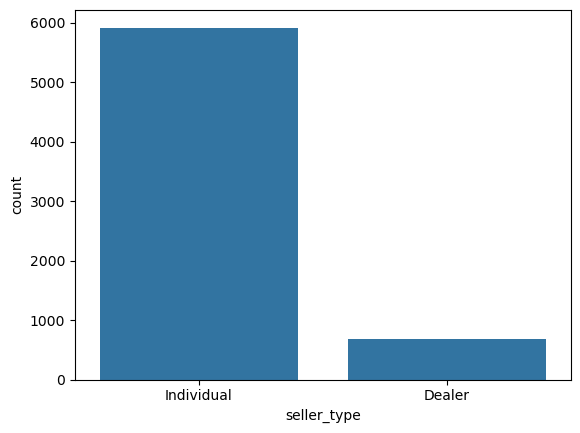

In [514]:
sns.countplot(data=df,x="seller_type")

<Axes: xlabel='fuel', ylabel='count'>

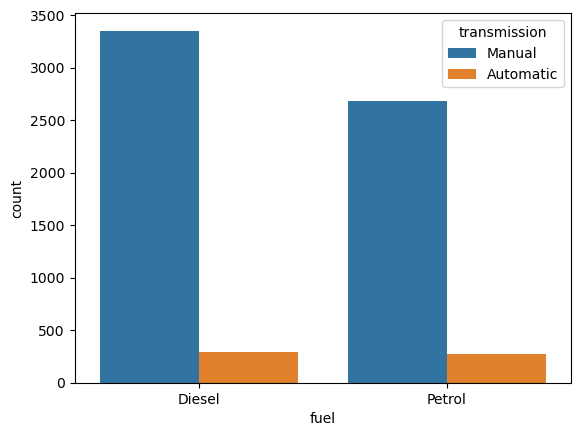

In [515]:
sns.countplot(data=df,x="fuel",hue="transmission")
#We can see that  Diesel and Petrol fuel usage is similar for  Automatic and Manual cars 

<Axes: xlabel='transmission', ylabel='count'>

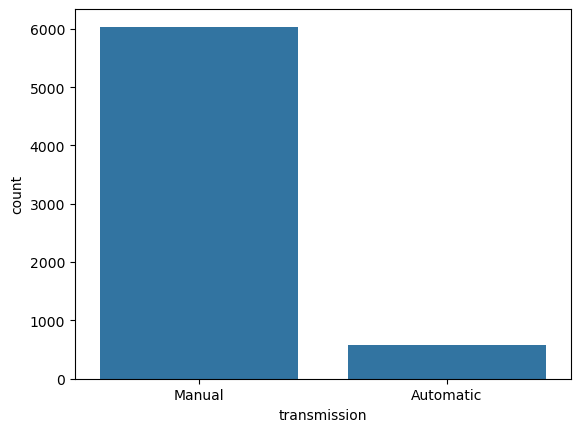

In [516]:
sns.countplot(data=df,x="transmission")

In [517]:
#Transmission is another highely imbalanced feature, onnly 8% of data has Automatic transmission
df_transmission=df[df["transmission"]=="Automatic"]
len(df_transmission)/len(df)*100

8.642349023762677

<Axes: xlabel='km_driven', ylabel='selling_price'>

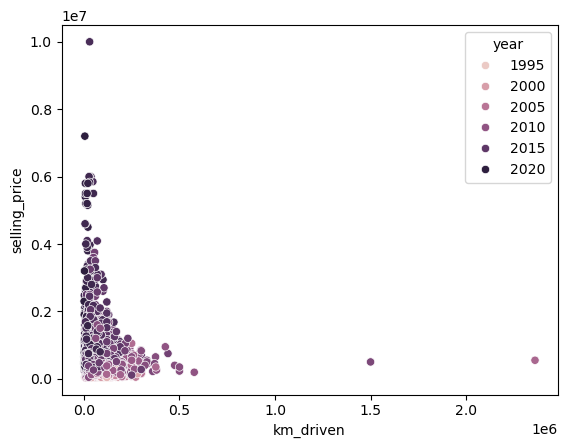

In [518]:
sns.scatterplot(data=df,x="km_driven",y="selling_price",hue="year")
#We can see that km_driven has some outliers

In [519]:
#We can see that there are outliers that need to be removed
df_no_outliers = df[df['km_driven'] < 500000] 
#The percent of selected outliers is
(len(df)-len(df_no_outliers))/len(df)*100

0.07567731194187982

(-10000.0, 500000.0)

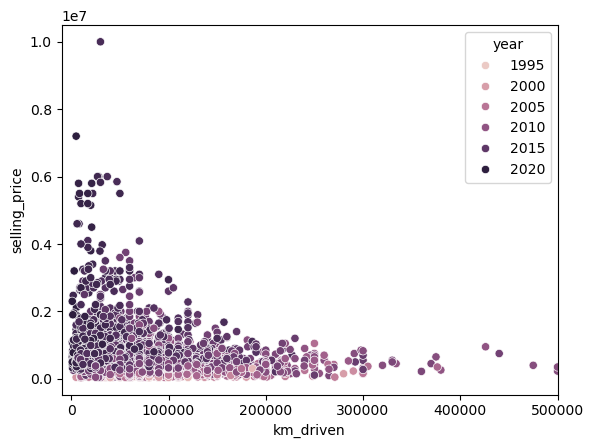

In [520]:
sns.scatterplot(data=df,x="km_driven",y="selling_price",hue="year")
plt.xlim(-10000,500000)
#We can see that the less km_driven and the newer the car, the more expensive it is

<Axes: xlabel='seats', ylabel='count'>

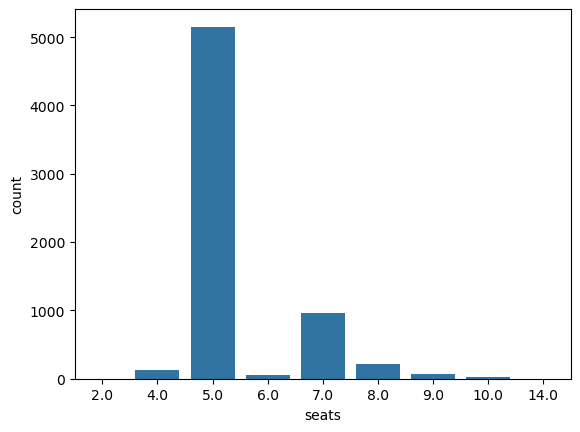

In [521]:
sns.countplot(data=df,x="seats")

In [522]:
#It is better to have to bins for number of seats >5 and seats<=5
bins=[0,5,15] #Interval bins
labels=["5 or less","more than 5"]
df['seat_category'] = pd.cut(df['seats'], bins=bins, labels=labels)
#We will keep this new column and drop seats column
df=df.drop("seats",axis=1)

<Axes: xlabel='seat_category', ylabel='count'>

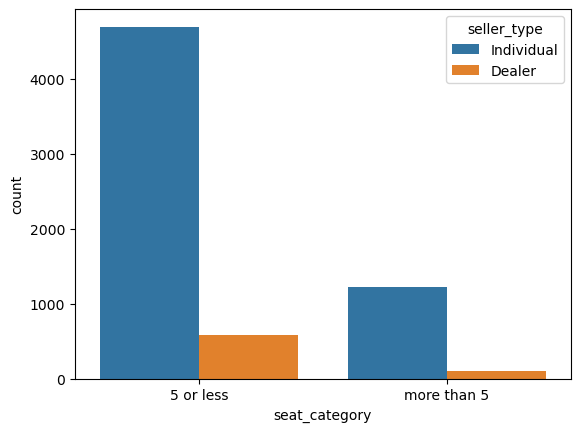

In [523]:
sns.countplot(data=df,x="seat_category",hue="seller_type")

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6607 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           6607 non-null   int64   
 1   selling_price  6607 non-null   int64   
 2   km_driven      6607 non-null   int64   
 3   fuel           6607 non-null   object  
 4   seller_type    6607 non-null   object  
 5   transmission   6607 non-null   object  
 6   owner          6607 non-null   object  
 7   mileage        6607 non-null   float64 
 8   engine         6607 non-null   float64 
 9   max_power      6607 non-null   float64 
 10  seat_category  6607 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 574.4+ KB


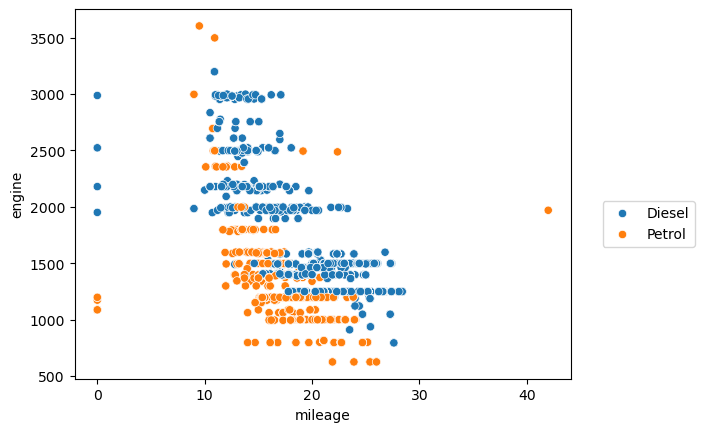

In [525]:
#mileage of the car vs engine capacity
sns.scatterplot(data=df,x="mileage",y="engine",hue="fuel")
plt.legend(bbox_to_anchor=(1.05,0.5))

In [526]:
#It looks like the cars with engine capacity>2000 Cubic Capacity mostly use Diesel
#We will also remove outliers in milage

<Axes: xlabel='max_power', ylabel='transmission'>

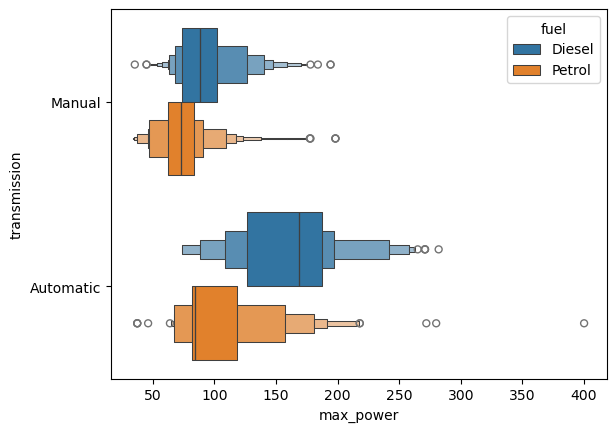

In [527]:
sns.boxenplot(data=df,x="max_power",y="transmission",hue="fuel")
#It looks like max_power in average is higher for Automatic transmission
#Lets remove the outliers in max_power

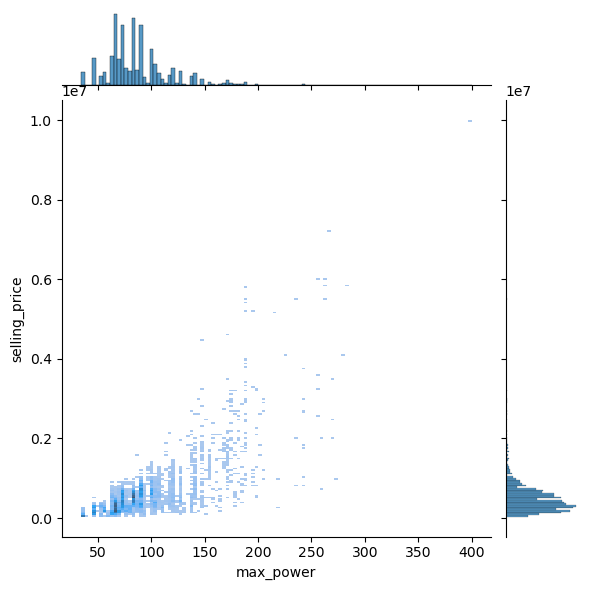

In [528]:
sns.jointplot(data=df,y="selling_price",x="max_power",kind="hist")
#we can see a correlation, the cars with small max_power have cheaper price

In [529]:
#Now lets remove all the outliers we discussed above

df_no_outliers_filter=(df['selling_price'] < 4000000)
df_no_outliers_filter=df_no_outliers_filter & (df['year'] > 2000)
df_no_outliers_filter=df_no_outliers_filter & (df['km_driven'] < 500000)
df_no_outliers_filter=df_no_outliers_filter & (df['mileage'] > 5) & (df['mileage'] < 40)
df_no_outliers_filter=df_no_outliers_filter & (df["max_power"]<300)

In [530]:
(len(df)-len(df[df_no_outliers_filter]))/len(df) *100
#This removes 1.4 percent of data

1.4075980021189647

In [531]:
df=df[df_no_outliers_filter]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6514 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           6514 non-null   int64   
 1   selling_price  6514 non-null   int64   
 2   km_driven      6514 non-null   int64   
 3   fuel           6514 non-null   object  
 4   seller_type    6514 non-null   object  
 5   transmission   6514 non-null   object  
 6   owner          6514 non-null   object  
 7   mileage        6514 non-null   float64 
 8   engine         6514 non-null   float64 
 9   max_power      6514 non-null   float64 
 10  seat_category  6514 non-null   category
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 566.3+ KB


In [532]:
#Now lets use one-hot encoding for categorical variables
df_corr=pd.get_dummies(df).corr()["selling_price"]

In [533]:
df_corr

year                            0.490848
selling_price                   1.000000
km_driven                      -0.200372
mileage                        -0.125400
engine                          0.474134
max_power                       0.692053
fuel_Diesel                     0.299575
fuel_Petrol                    -0.299575
seller_type_Dealer              0.238321
seller_type_Individual         -0.238321
transmission_Automatic          0.442463
transmission_Manual            -0.442463
owner_First Owner               0.267102
owner_Second Owner             -0.169843
owner_Third and above owners   -0.181153
seat_category_5 or less        -0.254652
seat_category_more than 5       0.254652
Name: selling_price, dtype: float64

In [534]:
df_corr_plot=df_corr.drop("selling_price").sort_values()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'transmission_Manual'),
  Text(1, 0, 'fuel_Petrol'),
  Text(2, 0, 'seat_category_5 or less'),
  Text(3, 0, 'seller_type_Individual'),
  Text(4, 0, 'km_driven'),
  Text(5, 0, 'owner_Third and above owners'),
  Text(6, 0, 'owner_Second Owner'),
  Text(7, 0, 'mileage'),
  Text(8, 0, 'seller_type_Dealer'),
  Text(9, 0, 'seat_category_more than 5'),
  Text(10, 0, 'owner_First Owner'),
  Text(11, 0, 'fuel_Diesel'),
  Text(12, 0, 'transmission_Automatic'),
  Text(13, 0, 'engine'),
  Text(14, 0, 'year'),
  Text(15, 0, 'max_power')])

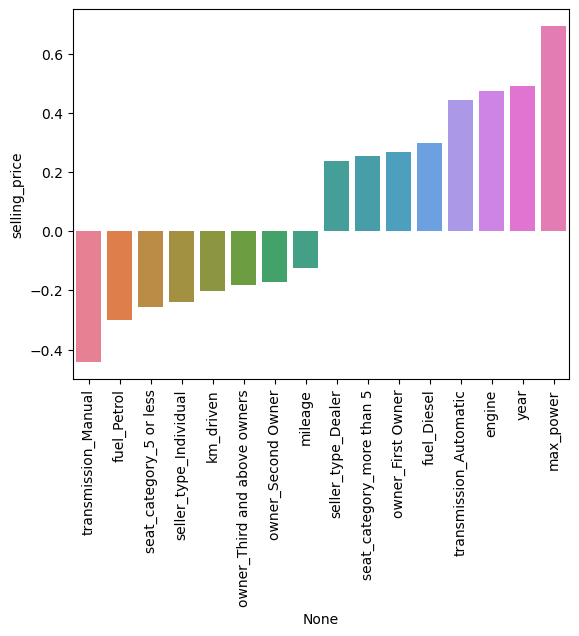

In [535]:
sns.barplot(x=df_corr_plot.index,y=df_corr_plot,hue=df_corr_plot.index)
plt.xticks(rotation=90)

In [536]:
#We can see the features with highest correlations with "Selling_price" on the very left and right sides,
#where max_pwer shows the highest correlation